# Statistiques et Analyse en Composante Principale

### On donne les fonctions du TP précédent

In [3]:
# Ecrire une fonction donnant la moyenne d'une série statistique
def moy(X):
    e=0
    n=len(X)
    for i in range(n):
        e+=X[i]
    return e/n

In [4]:
# La variance d'une série statistique:
def varS(X):
    v=0
    n=len(X)
    m=moy(X)
    for i in range(n):
        v+=(X[i]-m)^2
    return v/n

In [5]:
# l'écart-type
def ecTypeS(X):
    return sqrt(varS(X))

In [6]:
# Ecrire une fonction donnant la loi marginals  P(X=a) à partir des lois conjointes 
def margX(a,Y,C):
    s=0
    for j in Y:
        s+=C[(a,j)]
    return s

In [7]:
# Toutes les lois marginales de X sous forme d'un dictionnaire
def MargX(X,Y,C):
    return {i:margX(i,Y,C) for i in X}

In [8]:
# idem pour Y
def margY(b,X,C):
    s=0
    for i in X:
        s+=C[(i,b)]
    return s

In [9]:
# Calcul des lois marginales de Y à partir de la matrice conjointe
def MargY(X,Y,C):
    return {j:margY(j,X,C) for j in Y}

In [10]:
# Ecrire une fonction calculant la covariance d'un couple de séries statistiques
def covS(X,Y):
    #Calcul des espérances
    EX = moy(X)
    EY = moy(Y)
    c = 0
    for x, y in zip(X, Y):
        c += x * y
        pass
    return c / len(X) - EX * EY

In [11]:
# et le Coefficient de corrélation d'une série statistique
def corS(X,Y):
    return n(covS(X,Y)/(ecTypeS(X)*ecTypeS(Y)))

In [12]:
# Construction de la matrice de covariance 
def matCov(D):
    M = [[0 for _ in D] for _ in D]
    
    for i in range(len(D)):
        for j in range(len(D)):
            M[i][j] = covS(D[i], D[j])
            pass
        pass
    return matrix(RR, M)

In [13]:
# et de la matrice de corrélation
def matCor(D):
    M = [[0 for _ in D] for _ in D]
    
    for i in D:
        for j in D:
            M[i][j] = corS(D[i],D[j])
            pass
        pass
    return matrix(RR, M)

## Exercice 1 

In [14]:
# Etude qualitative de 4 variables aléatoires couplées
data={0:[0,1,2,3,4,5,6,7,8,9,10] ,
  1:[2.04,3.02,4.15,4.97,6.02,7.08,8.12,9.14,10.13,10.86,11.89],
  2:[5.01,7.93,3.27,20.50,11.33,12.41,16.74,11.39,16.61,11.48,23.59],
  3:[7.45,8.20,2.09,9.03,7.99,8.58,9.63,5.06,2.49,8.22,8.01],
  4:[10.04,9.02,8.97,8.15,6.02,5.08,4.12,3.14,2.86,2.13,1.89]}

In [15]:
show(matCov(data))

[   10.0000000000000    9.90818181818182    12.2100000000000  -0.201818181818190   -8.96000000000000]
[   9.90818181818182    9.82534214876033    11.9971925619835  -0.331259504132234   -8.89960247933884]
[   12.2100000000000    11.9971925619835    35.1811537190083    5.10836611570248   -10.2181851239669]
[ -0.201818181818190  -0.331259504132234    5.10836611570248    6.07921983471074 -0.0382900826446360]
[  -8.96000000000000   -8.89960247933884   -10.2181851239669 -0.0382900826446360    8.29707768595041]

In [16]:
show(matCor(data))

[    1.00000000000000    0.999585910639363    0.650969476394899  -0.0258842964468339   -0.983660951392354]
[   0.999585910639363    0.999999999999999    0.645283781109229  -0.0428618174009170   -0.985676014953601]
[   0.650969476394899    0.645283781109229     1.00000000000000    0.349303592720273   -0.598075689504387]
[ -0.0258842964468339  -0.0428618174009170    0.349303592720273    0.999999999999999 -0.00539137823760026]
[  -0.983660951392354   -0.985676014953601   -0.598075689504387 -0.00539137823760026     1.00000000000000]

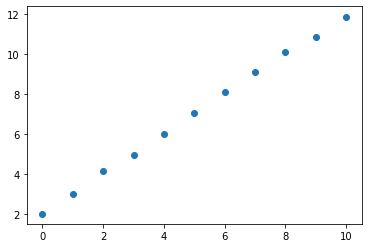

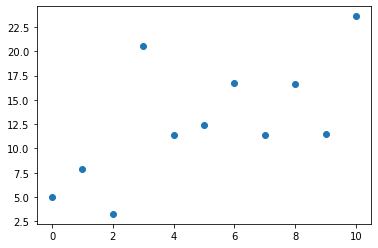

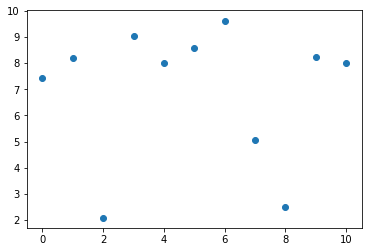

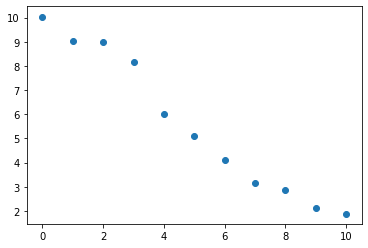

In [17]:
import matplotlib.pyplot as plt
# Représenter sur un même graphique les corrélations de la variable 1 avec les 4 autres variables

for points in list(data)[1:] : # on retire le premier element de la liste, pas 1
    plt.scatter(data[0], data[points])
    plt.show()
    pass

Text(0.5, 1.0, 'Représentation géométrique de la corrélation')

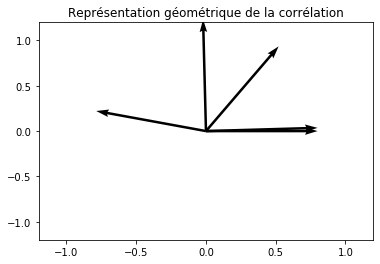

In [18]:
# Représentation géométriquement les corrélations avec la première variable
import matplotlib.pyplot as plt
import numpy as np

X = np.array([0,0,0,0,0], dtype = float)
Y= np.array([0,0,0,0,0], dtype = float)

# à compléter
U = np.array(matCor(data)[0], dtype = float)
V = np.array([sin(arccos(val)) for val in U], dtype = float)

plt.quiver(X, Y, U, V,scale=3)
a=1.2
plt.xlim(-a,a)
plt.ylim(-a,a)
plt.title("Représentation géométrique de la corrélation")

### Exercice 2 :  Voitures

In [19]:
voitures={"Alfasud" : [1350 ,79 ,393, 161, 870 ,165],
"Audi" : [1588, 85, 468, 177, 1110 ,160 ],
"Simca"  : [1294 ,68, 424, 168, 1050 ,152 ],
"Citroen"  : [1222, 59, 412, 161, 930 ,151 ],
"Fiat" : [1585, 98, 439, 164,1105 ,165 ],
"Lancia"  :[1297 ,82 ,429, 169, 1080 ,160 ],
"Peugeot" :[ 1796, 79, 449 ,169, 1160 ,154 ],
"Renault16" : [1565,55, 424, 163, 1010 ,140], 
"Renault30": [2664, 128, 452, 173, 1320,180], 
"Toyota" : [1166, 55 ,399, 157, 815, 140], 
"Alfetta" :[ 1570, 109, 428, 162, 1060, 175], 
"Princess" : [1798 ,82, 445, 172, 1160 ,158 ],
"Datsun" :[1998 ,115, 469, 169, 1370 ,160 ],
"Taunus" : [1993, 98 ,438 ,170, 1080 ,167 ],
"Rancho" :[1442 ,80 ,431, 166, 1129, 144 ],
"Mazda" :[1769 ,83,440,165 ,1095, 165 ],
"Opel": [1979, 100 ,459 ,173, 1120 ,173], 
"Lada" : [1294, 68, 404 ,161, 955, 140] }

In [22]:
# Définir sous forme d'un dictionnaire, les 6 variables (cylindrée, puissance, longueur, largeur, poids, vitesse max)

L = [
    'cylindree',
    'puissance',
    'longueur',
    'largeur',
    'poids',
    'vitesse max',
]

Z = {key:[] for key in L}

for marque in voitures :
    liste = voitures[marque]
    
    for index, value in zip(range(len(liste)), liste) :
        Z[L[index]].append(value)
        pass
    
    pass

show(Z)

{'cylindree': [1350,
  1588,
  1294,
  1222,
  1585,
  1297,
  1796,
  1565,
  2664,
  1166,
  1570,
  1798,
  1998,
  1993,
  1442,
  1769,
  1979,
  1294],
 'puissance': [79,
  85,
  68,
  59,
  98,
  82,
  79,
  55,
  128,
  55,
  109,
  82,
  115,
  98,
  80,
  83,
  100,
  68],
 'longueur': [393,
  468,
  424,
  412,
  439,
  429,
  449,
  424,
  452,
  399,
  428,
  445,
  469,
  438,
  431,
  440,
  459,
  404],
 'largeur': [161,
  177,
  168,
  161,
  164,
  169,
  169,
  163,
  173,
  157,
  162,
  172,
  169,
  170,
  166,
  165,
  173,
  161],
 'poids': [870,
  1110,
  1050,
  930,
  1105,
  1080,
  1160,
  1010,
  1320,
  815,
  1060,
  1160,
  1370,
  1080,
  1129,
  1095,
  1120,
  955],
 'vitesse max': [165,
  160,
  152,
  151,
  165,
  160,
  154,
  140,
  180,
  140,
  175,
  158,
  160,
  167,
  144,
  165,
  173,
  140]}

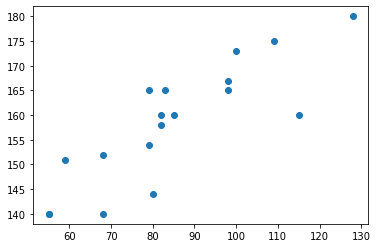

In [23]:
#Représenter quelques corrélations entre couples de variables
plt.scatter(Z[L[1]], Z[L[5]])
plt.show()


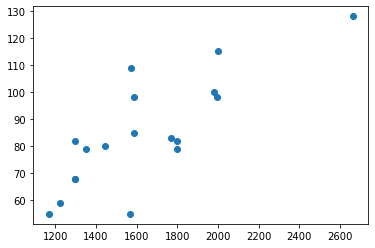

In [24]:
plt.scatter(Z[L[0]], Z[L[1]])
plt.show()

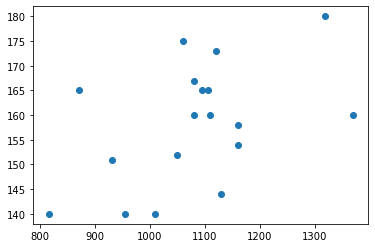

In [25]:
plt.scatter(Z[L[4]], Z[L[5]])
plt.show()

In [26]:
# C'est parti pour l'Analyse en Composante Principale
#oui

In [27]:
# calculer la matrice de corrélation

In [28]:
# Avec numpy
import numpy as np

test = np.stack((Z[L[0]],Z[L[1]],Z[L[2]], Z[L[3]],Z[L[4]],Z[L[5]]))
Cor=np.corrcoef(test)

show(Cor)

array([[1.        , 0.79662771, 0.70146192, 0.62975716, 0.78895203,
        0.66493402],
       [0.79662771, 1.        , 0.64136235, 0.52083197, 0.765293  ,
        0.84437948],
       [0.70146192, 0.64136235, 1.        , 0.84926635, 0.86809028,
        0.47592847],
       [0.62975716, 0.52083197, 0.84926635, 1.        , 0.71687392,
        0.47294527],
       [0.78895203, 0.765293  , 0.86809028, 0.71687392, 1.        ,
        0.4775956 ],
       [0.66493402, 0.84437948, 0.47592847, 0.47294527, 0.4775956 ,
        1.        ]])

In [29]:
#Déterminer ses valeurs propres

X = matrix(QQ, Cor)

vp = X.eigenvalues()
print(vp)

[0.04329027267594054?, 0.0928012120059281?, 0.2139220890233096?, 0.3730660774399736?, 0.8560622892459589?, 4.420858059608889?]


In [30]:
vp.reverse()
show(vp)

[4.420858059608889?, 0.8560622892459589?, 0.3730660774399736?, 0.2139220890233096?, 0.0928012120059281?, 0.04329027267594054?]

In [31]:
# Calculer l'inertie de la composante principale et du plan principal

print(sum(vp))

#calcul de la part d inertie

print((vp[0]+vp[1])/sum(vp))


6.000000000000000?
0.8794867248091414?


<BarContainer object of 6 artists>

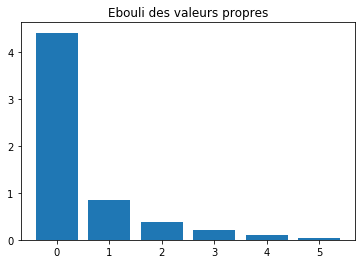

In [32]:
#Représenter l'ébouli des valeurs propres

plt.title("Ebouli des valeurs propres")
plt.bar(range(len(vp)), vp)

In [33]:
# Diagonaliser la matrice de corrélation. Soit P sa matrice de passage

In [34]:
D = []

for i in range(len(vp)):
    u=[0 for i in range(len(vp))]
    u[i]=vp[i]
    D.append(u)

D,P = matrix(Cor).eigenmatrix_right()

#chaque valeur est retire la moyenne de sa ligne et divise par l ecart type de sa ligne
#centre reduit !

X = []
for ligne in test :
    L = []
    ecarttype = ecTypeS(ligne)
    moyenne = moy(ligne)
    for valeur in ligne :
        L.append((valeur - moyenne) / ecarttype)
        pass
    X.append(L)
    pass
X = matrix(X).transpose()

show(QQ, X)

/usr/lib/python3/dist-packages/scipy/sparse/sputils.py:16: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/lib/python3/dist-packages/scipy/linalg/__init__.py:217: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func


Rational Field [   -0.775098891732314   -0.2833581759860091   -1.8850807722650857   -1.0973452814254328     -1.56900676417733    0.5697604307116213]
[ -0.12016326013838259    0.0196386854643767    1.6058095467443323       2.0010413955405   0.23416142450212413   0.14597168059553975]
[  -0.9292013932838273   -0.8388524219783832   -0.4421794404078596   0.25819888974716293  -0.21663062266773941   -0.5320903195901907]
[   -1.127333180992916   -1.2933477141539618   -1.0007218914493665   -1.0973452814254328   -1.1182147170074666   -0.6168480696134071]
[ -0.12841875129292796     0.676131885273546   0.25599862339402396   -0.5163977794943203   0.19659542057130217    0.5697604307116213]
[  -0.9209459021292821   -0.1318597452608162   -0.2094534191405651    0.4518480570575337  0.008765400917192362   0.14597168059553975]
[   0.4522174599100953   -0.2833581759860091    0.7214506659286131    0.4518480570575337    0.6098214638103437  -0.36257481954375814]
[ -0.18345535898989698   -1.4953456217875525   -0.4421794404078596   -0.7100469468046912   -0.5171586541143152   -1.5491833198687865]
[   2.8408062339585514     2.191116192525475    0.8610862786889898     1.226444726299017    1.8119335895966466     1.841126681059866]
[  -1.2814356825444293   -1.4953456217875525   -1.6058095467443323   -1.8719419506669162   -1.9822328074163718   -1.5491833198687865]
[ -0.16969620706565472      1.23162613126592  -0.25599862339402396    -0.903696114115062   -0.1414986148060955    1.4173379309437844]
[  0.45772112067979226   -0.1318597452608162    0.5352698489147775    1.0327955589886462    0.6098214638103437 -0.023543819450892886]
[   1.0080871976494825    1.5346229927163058    1.6523547509977912    0.4518480570575337     2.187593628904866   0.14597168059553975]
[   0.9943280457252404     0.676131885273546    0.2094534191405651    0.6454972243679046  0.008765400917192362     0.739275930758054]
[  -0.5219304963262565  -0.23285869907761148  -0.11636301063364726  -0.12909944487357872    0.3769122394392476   -1.2101523197759212]
[   0.3779180395191872  -0.08136026835241858    0.3025438276474829   -0.3227486121839495   0.12146341270965826    0.5697604307116213]
[    0.955802420337362    0.7771308390903412    1.1869027084632022     1.226444726299017   0.30929343236376805    1.2478224308973518]
[  -0.9292013932838273   -0.8388524219783832   -1.3730835254770377   -1.0973452814254328   -0.9303846973533567   -1.5491833198687865]

In [35]:
# Construire les deux composantes principales
C = X * P

C2=C.transpose()
show(C)
C1 = C2[0]
C2 = C2[1]

[   -2.138923609204143    1.7856810217132673   -0.5718622807432805   0.20192734157459688    -0.301356961663131  0.053920792454670796]
[   1.5614585872895594   -1.5270402725891457   -1.3152713538706045  -0.21135153778747517   0.14851613917312084   -0.3272384360591551]
[  -1.1193852830595177   -0.6745051723209042  -0.45658810250793186  -0.16762584142994666  -0.37536398276481514    0.2718032324363352]
[   -2.573741704965676    0.1128841613835137  -0.14856979614820864  -0.01734322359799497   0.22685321633032246    0.2634762312293686]
[   0.4278552011804999    0.6955673145483513   0.19328567418850395   -0.6277544823369468    0.2635053087415851  -0.03715265383458488]
[  -0.3042376447359467   -0.1961487838858056    -0.675803166337836   -0.5559413664344204   -0.4450859429981149   0.20008299083215345]
[   0.6839284963029297   -0.9330567656936948   0.25682308293388467   0.20313429176957798   0.20865164978003625   0.15389175102601854]
[  -1.9484925660923171   -0.9804480462795446    0.6195748784389317    0.6303191585287815    0.2931651260818917    0.1086417934789986]
[    4.409734571040129    1.0636331700602373    0.5935284189237671     0.847247784909691   -0.3748896691806752   0.04399657072484975]
[  -3.9857824179661616   0.23624041740891033   0.30313335906302863    0.2651217957093108   0.27842845600856925   -0.3288919918433235]
[   0.4376581850019715    1.9124481608594084 -0.024942239634070162   -0.7589104198476664    0.1681026658437124  -0.05424074511874577]
[   1.0181753819831276   -0.8417120976691791  -0.21661021489996726   0.30342641515361685   -0.1848757846409109   0.18489356268118645]
[    2.941080314093147   -0.5591745927458185     1.243988161476783   -0.7721710674892495   0.05441212930810409 -0.057262658990077764]
[    1.314880383090937    0.4865224579258676  -0.28262140071426817    0.5822262348465359   -0.0667346706654699   -0.2530917609275503]
[  -0.6911113710103416   -0.8977213940083679    0.6284068932363169  -0.35773668652381696   -0.3770859280146286  -0.12153156413582022]
[   0.3857088663220818    0.3561845725211762   0.07558298916404182   0.10289944753823208    0.5270430059735904    0.3388319454309855]
[   2.2897682429160504   0.10434464479517791   -0.7963837793345137   0.23634748264999494   0.33846112502501097  -0.15668107513770868]
[  -2.7085736321863125   -0.1436987960234628    0.5743288767654011   0.09618467276717946  -0.38174588233821444   -0.2834479842475919]

Text(0.5, 1.0, 'Tracé suivant les composantes principales')

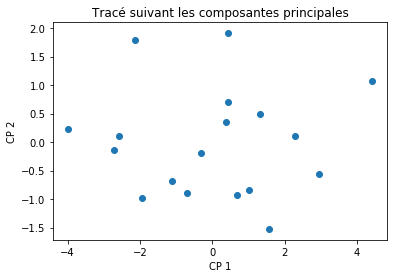

In [36]:
# Tracé les différents véhicules suivant les deux composantes principales
plt.scatter(C1,C2,marker='o')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")



<BarContainer object of 6 artists>

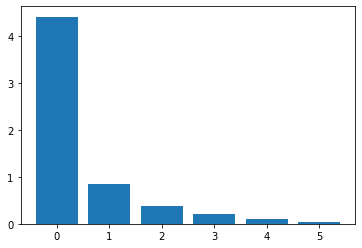

In [37]:
# Représenter graphiquement les contributions des variables aux composantes principales :

plt.bar(range(len(vp)), vp)


### Exercice 3 : Jus de fruit 

In [36]:
# Un jus de fruit est caractériqsé par les caractéristiques suivantes : 
# odeur, pulpeux, couleur, acidité, amertume, sucré, originalité
data={1:[2.82,2.53,1.66,3.46,3.15,2.97,2.60],
      2:[2.76,2.82,1.91,3.23,2.55,2.08,3.32 ],
      3:[2.83,2.88,4.0,3.45,2.42,1.76,3.38 ],
      4:[2.76,2.59,1.66,3.37,3.05,2.56,2.8 ],
      5:[3.2,3.02,3.69,3.12,2.33,1.97,3.34 ],
      6:[3.07,2.73,3.34,3.54,3.31,2.63,2.9 ],
     }

In [38]:
voitures={"Alfasud" : [1350 ,79 ,393, 161, 870 ,165],
"Audi" : [1588, 85, 468, 177, 1110 ,160 ],
"Simca"  : [1294 ,68, 424, 168, 1050 ,152 ],
"Citroen"  : [1222, 59, 412, 161, 930 ,151 ],
"Fiat" : [1585, 98, 439, 164,1105 ,165 ],
"Lancia"  :[1297 ,82 ,429, 169, 1080 ,160 ],
"Peugeot" :[ 1796, 79, 449 ,169, 1160 ,154 ],
"Renault16" : [1565,55, 424, 163, 1010 ,140], 
"Renault30": [2664, 128, 452, 173, 1320,180], 
"Toyota" : [1166, 55 ,399, 157, 815, 140], 
"Alfetta" :[ 1570, 109, 428, 162, 1060, 175], 
"Princess" : [1798 ,82, 445, 172, 1160 ,158 ],
"Datsun" :[1998 ,115, 469, 169, 1370 ,160 ],
"Taunus" : [1993, 98 ,438 ,170, 1080 ,167 ],
"Rancho" :[1442 ,80 ,431, 166, 1129, 144 ],
"Mazda" :[1769 ,83,440,165 ,1095, 165 ],
"Opel": [1979, 100 ,459 ,173, 1120 ,173], 
"Lada" : [1294, 68, 404 ,161, 955, 140] }

caracteristiques = [
    'cylindree',
    'puissance',
    'longueur',
    'largeur',
    'poids',
    'vitesse max',
]

Z = {key:[] for key in caracteristiques}

for marque in voitures :
    liste = voitures[marque]
    
    for index, value in zip(range(len(liste)), liste) :
        Z[caracteristiques[index]].append(value)
        pass
    
    pass

M = np.stack((
    Z[caracteristiques[0]],
    Z[caracteristiques[1]],
    Z[caracteristiques[2]],
    Z[caracteristiques[3]],
    Z[caracteristiques[4]],
    Z[caracteristiques[5]]
))

In [ ]:
import numpy as np

# 1. on calcule la matrice de correlation
COR = np.corrcoef(M)
COR = matrix(QQ, COR)

# 2. on calcule les valeurs propres de la matrice
vp = COR.eigenvalues()

plt.title("Ebouli des valeurs propres")
bar = plt.bar(caracteristiques, vp)
plt.show()

# 3. on recupere la matrice de passage
_, P = COR.eigenmatrix_right()

# 4. on calcule X

#chaque valeur est retire la moyenne de sa ligne et divise par l ecart type de sa ligne
#centre reduit !
X = []
for ligne in M :
    L = []
    ecarttype = ecTypeS(ligne)
    moyenne = moy(ligne)
    for valeur in ligne :
        L.append((valeur - moyenne) / ecarttype)
        pass
    X.append(L)
    pass
X = matrix(QQ, X).transpose()

# 5. on calcule X * P
C = X * P

# 6. on extrait la premiere et la deuxieme colonne de C
CT = C.transpose()
C1 = CT[0]
C2 = CT[1]

# 7. on fait des show
nuage = plt.scatter(C1,C2,marker='o')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")
plt.show()
plt.close()